In [1]:
using Knet, Test, Base.Iterators, Printf, LinearAlgebra, Random, CUDA, IterTools, DelimitedFiles, Statistics
Knet.atype() = KnetArray{Float32}
using Images, TestImages, OffsetArrays, Colors
using Plots

In [2]:
include("models/transformer.jl")
include("dataloader/dataloader.jl")

prepare_batch (generic function with 1 method)

In [3]:
# read  files
annotations = readdlm("archive/annotations_train.txt", '\t', String, '\n')[2:end,2:end]

# prepare vocab object
bow = ""
for sent in annotations[:,2]
    bow *= sent
end
#bow = split(bow)
# bow wil be one giant sentence, corpus.
v = Vocab(bow)

# Initialize Iterators
img_iterator = ImgReader("archive/img_dirs_train.txt",load_and_process)
tgt_iterator = TextReader("archive/ann_caps_train.txt",v)

# simulate retrieving one batch
img_state, tgt_state = nothing, nothing
flag = true
iter = 1
batch = get_next_batch(img_iterator, tgt_iterator, img_state, tgt_state)

batch_imgs, batch_indices, img_state, tgt_state = batch
batch_imgs, batch_indices, labels = prepare_batch(batch, tgt_iterator)
println(iter)

1


KnetArray{Float32, 3}AutoGrad.Result{KnetArray{Float32, 3}}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}["<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>";;]


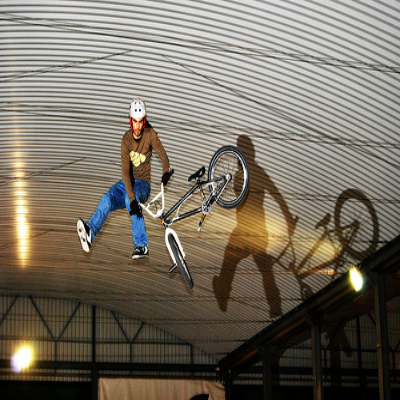

In [4]:
# build Image Caption Generating Transformer
transformer = Transformer(128, length(tgt_iterator.vocab.i2w), tgt_iterator.vocab.eos, false)

# simulate forward training pass without autograd- returns loss value
transformer(batch_imgs, batch_indices, labels)

# simulate forward training pass with autograd- returns Tape object T
loss = @diff transformer(batch_imgs, batch_indices, labels)

# updates
for p in params(transformer)
    #p .-= 0.1 .* grad(loss, p)
    diff_p = grad(loss, p)
    if diff_p == nothing
        continue
    else
        p .= p - (0.1 .* diff_p)
    end
end

# simulate inference
sample_img, pred_sent = transformer(batch_imgs[:,:,:,1:1]);
println(tgt_iterator.vocab.i2w[pred_sent]);
colorview(RGB, Array(sample_img))

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 24/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 28/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 32/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 36/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 40/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 44/8000
AutoGrad.Res

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 452/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 456/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 460/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 464/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 468/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 472/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 476/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 480/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 484/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 488/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 492/8000

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 904/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 908/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 912/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 916/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 920/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 924/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 928/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 932/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 936/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 940/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 944/8000

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1352/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1356/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1360/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1364/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1368/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1372/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1376/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1380/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1384/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1388/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1796/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1800/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1804/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1808/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1812/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1816/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1820/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1824/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1828/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1832/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2240/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2244/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2248/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2252/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2256/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2260/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2264/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2268/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2272/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2276/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2688/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2692/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2696/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2700/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2704/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2708/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2712/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2716/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2720/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2724/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3132/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3136/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3140/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3144/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3148/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3152/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3156/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3160/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3164/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3168/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3576/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3580/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3584/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3588/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3592/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3596/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3600/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3604/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3608/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3612/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4024/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4028/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4032/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4036/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4040/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4044/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4048/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4052/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4056/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4060/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4468/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4472/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4476/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4480/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4484/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4488/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4492/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4496/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4500/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4504/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4912/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4916/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4920/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4924/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4928/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4932/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4936/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4940/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4944/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4948/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5360/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5364/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5368/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5372/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5376/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5380/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5384/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5388/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5392/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5396/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5804/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5808/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5812/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5816/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5820/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5824/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5828/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5832/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5836/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5840/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6248/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6252/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6256/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6260/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6264/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6268/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6272/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6276/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6280/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6284/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6696/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6700/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6704/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6708/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6712/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6716/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6720/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6724/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6728/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6732/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7140/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7144/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7148/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7152/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7156/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7160/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7164/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7168/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7172/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7176/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7584/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7588/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7592/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7596/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7600/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7604/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7608/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7612/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7616/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7620/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8032/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8036/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8040/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8044/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8048/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8052/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8056/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8060/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8064/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8068/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8476/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8480/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8484/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8488/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8492/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8496/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8500/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8504/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8508/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8512/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8920/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8924/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8928/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8932/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8936/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8940/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8944/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8948/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8952/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8956/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9368/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9372/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9376/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9380/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9384/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9388/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9392/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9396/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9400/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9404/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9812/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9816/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9820/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9824/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9828/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9832/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9836/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9840/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9844/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 9848/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10256/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10260/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10264/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10268/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10272/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10276/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10280/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10284/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10288/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10292/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10696/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10700/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10704/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10708/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10712/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10716/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10720/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10724/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10728/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 10732/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11136/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11140/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11144/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11148/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11152/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11156/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11160/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11164/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11168/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11172/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11576/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11580/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11584/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11588/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11592/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11596/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11600/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11604/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11608/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 11612/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12016/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12020/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12024/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12028/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12032/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12036/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12040/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12044/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12048/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12052/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12456/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12460/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12464/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12468/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12472/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12476/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12480/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12484/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12488/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12492/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12896/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12900/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12904/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12908/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12912/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12916/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12920/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12924/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12928/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12932/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13336/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13340/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13344/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13348/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13352/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13356/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13360/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13364/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13368/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13372/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13780/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13784/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13788/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13792/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13796/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13800/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13804/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13808/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13812/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 13816/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14220/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14224/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14228/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14232/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14236/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14240/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14244/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14248/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14252/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14256/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14660/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14664/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14668/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14672/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14676/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14680/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14684/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14688/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14692/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 14696/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15100/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15104/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15108/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15112/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15116/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15120/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15124/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15128/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15132/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15136/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15540/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15544/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15548/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15552/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15556/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15560/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15564/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15568/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15572/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15576/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15980/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15984/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15988/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15992/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 15996/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16000/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16004/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16008/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16012/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16016/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16420/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16424/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16428/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16432/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16436/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16440/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16444/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16448/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16452/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16456/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16864/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16868/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16872/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16876/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16880/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16884/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16888/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16892/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16896/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16900/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17304/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17308/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17312/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17316/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17320/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17324/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17328/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17332/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17336/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17340/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17744/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17748/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17752/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17756/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17760/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17764/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17768/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17772/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17776/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 17780/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18184/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18188/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18192/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18196/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18200/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18204/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18208/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18212/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18216/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18220/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18624/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18628/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18632/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18636/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18640/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18644/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18648/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18652/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18656/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 18660/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19064/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19068/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19072/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19076/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19080/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19084/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19088/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19092/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19096/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19100/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19504/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19508/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19512/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19516/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19520/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19524/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19528/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19532/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19536/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19540/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19948/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19952/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19956/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19960/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19964/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19968/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19972/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19976/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19980/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 19984/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20388/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20392/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20396/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20400/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20404/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20408/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20412/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20416/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20420/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20424/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20828/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20832/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20836/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20840/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20844/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20848/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20852/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20856/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20860/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20864/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21268/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21272/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21276/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21280/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21284/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21288/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21292/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21296/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21300/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21304/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21708/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21712/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21716/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21720/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21724/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21728/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21732/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21736/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21740/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 21744/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22148/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22152/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22156/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22160/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22164/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22168/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22172/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22176/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22180/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22184/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float3

Excessive output truncated after 524291 bytes.

/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22592/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22596/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22600/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22604/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22608/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22612/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22616/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22620/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22624/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 22628/8000
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{

┌ Info: Loading pretrained weights...
└ @ Main.ResNetLib /home/tanjary21/Desktop/Julia/nlp/project/resnet/resnetlib.jl:295
┌ Info: Loading imagenet-resnet-50-dag.mat...
└ @ Main.ResNetLib /home/tanjary21/.julia/packages/Knet/YIFWC/data/imagenet.jl:12


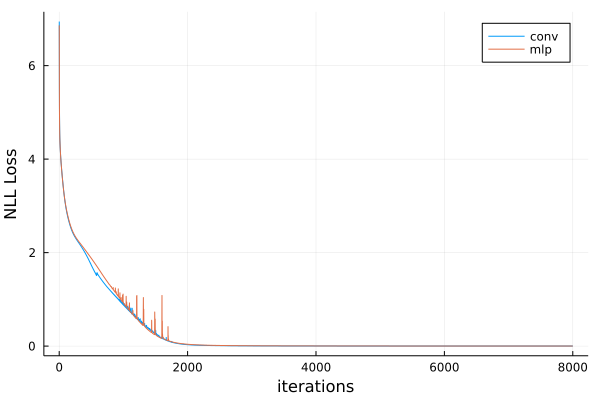

In [6]:
# OVERFIT TO SINGLE BATCH
transformer_conv = Transformer(128, length(tgt_iterator.vocab.i2w), tgt_iterator.vocab.eos, true)
transformer_mlp = Transformer(128, length(tgt_iterator.vocab.i2w), tgt_iterator.vocab.eos, false)
losses_conv = []
losses_mlp = []
for iter in 1:1:8000
    loss_conv = @diff transformer_conv(batch_imgs, batch_indices, labels)
    loss_mlp = @diff transformer_mlp(batch_imgs, batch_indices, labels)

    # updates
    for p in params(transformer_conv)
        diff_p = grad(loss_conv, p)
        if diff_p == nothing
            continue
        else
            p .= p - (0.1 .* diff_p)
        end
    end
    for p in params(transformer_mlp)
        diff_p = grad(loss_mlp, p)
        if diff_p == nothing
            continue
        else
            p .= p - (0.1 .* diff_p)
        end
    end

    println("iter: ", 4*iter, "/8000")#, "loss: ", value(loss_conv))
    push!(losses_conv, value(loss_conv))
    push!(losses_mlp, value(loss_mlp))
end

plot([losses_conv, losses_mlp], labels=["conv" "mlp"],xlabel="iterations",ylabel="NLL Loss")


In [41]:
losses[end]

0.00097417197f0

KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}["<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>";;]


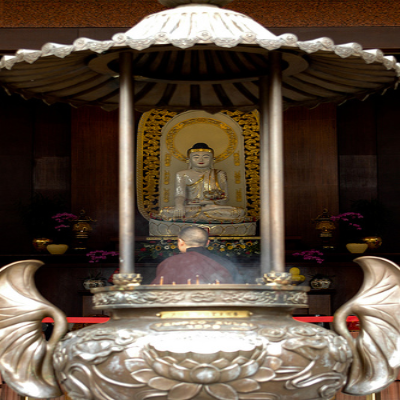

In [7]:
# simulate inference
sample_img, pred_sent = transformer_conv(batch_imgs[:,:,:,1:1]);
println(tgt_iterator.vocab.i2w[pred_sent]);
colorview(RGB, Array(sample_img))

KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}["<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>";;]


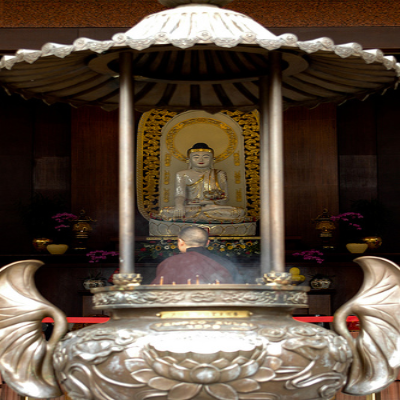

In [8]:
# simulate inference
sample_img, pred_sent = transformer_mlp(batch_imgs[:,:,:,1:1]);
println(tgt_iterator.vocab.i2w[pred_sent]);
colorview(RGB, Array(sample_img))

In [10]:
# show gt caption
labels2 = labels[:,:]
labels2[labels2.==0] .= 1
tgt_iterator.vocab.i2w[labels2[:,1]]

15-element Vector{String}:
 "<unk>"
 "a"
 "man"
 "is"
 "sitting"
 "in"
 "front"
 "of"
 "a"
 "buddist"
 "monument"
 "<eos>"
 "<eos>"
 "<eos>"
 "<eos>"

In [25]:
word_logits = transformer(batch_imgs, batch_indices)
word_probs = softmax(word_logits, dims=1)

KnetArray{Float32, 3}

908×15×20 KnetArray{Float32, 3}:
[:, :, 1] =
 1.0          0.0          0.0          …  1.0          0.999854
 1.82559f-28  0.999992     7.59751f-29     1.53044f-26  8.10914f-25
 0.0          4.02643f-29  1.0             0.0          0.0
 1.40402f-33  1.1878f-22   6.85542f-16     2.80333f-32  9.16907f-27
 0.0          1.1f-44      1.91027f-30     0.0          0.0
 0.0          0.0          1.08883f-35  …  0.0          0.0
 1.16075f-15  7.42847f-38  7.0f-45         1.09152f-15  2.03829f-12
 2.20697f-14  2.5344f-33   6.845f-42       7.93747f-14  2.08943f-9
 0.0          7.34607f-18  4.73827f-7      0.0          0.0
 6.54062f-15  6.46896f-38  7.7f-42         3.45406f-15  2.35178f-12
 0.0          7.0f-45      3.8352f-17   …  0.0          0.0
 1.0215f-41   1.45473f-12  6.07006f-12     7.1724f-41   6.96769f-37
 1.28976f-40  4.33779f-22  3.41616f-18     2.39685f-37  8.14404f-27
 ⋮                                      ⋱               
 1.5f-44      1.31474f-35  2.73591f-38     3.2f-44      3.

In [37]:
argmax(word_probs, dims=1)[1,:,:]

15×20 Matrix{CartesianIndex{3}}:
 CartesianIndex(1, 1, 1)     …  CartesianIndex(1, 1, 20)
 CartesianIndex(2, 2, 1)        CartesianIndex(2, 2, 20)
 CartesianIndex(3, 3, 1)        CartesianIndex(3, 3, 20)
 CartesianIndex(11, 4, 1)       CartesianIndex(77, 4, 20)
 CartesianIndex(10, 5, 1)       CartesianIndex(15, 5, 20)
 CartesianIndex(44, 6, 1)    …  CartesianIndex(7, 6, 20)
 CartesianIndex(5, 7, 1)        CartesianIndex(32, 7, 20)
 CartesianIndex(50, 8, 1)       CartesianIndex(106, 8, 20)
 CartesianIndex(12, 9, 1)       CartesianIndex(2, 9, 20)
 CartesianIndex(3, 10, 1)       CartesianIndex(1, 10, 20)
 CartesianIndex(815, 11, 1)  …  CartesianIndex(1, 11, 20)
 CartesianIndex(446, 12, 1)     CartesianIndex(1, 12, 20)
 CartesianIndex(1, 13, 1)       CartesianIndex(1, 13, 20)
 CartesianIndex(1, 14, 1)       CartesianIndex(1, 14, 20)
 CartesianIndex(1, 15, 1)       CartesianIndex(1, 15, 20)

In [49]:
println(tgt_iterator.vocab.i2w[labels]);

LoadError: BoundsError: attempt to access 908-element Vector{String} at index [[2 2 … 2 2; 3 3 … 3 3; … ; 0 0 … 810 0; 0 0 … 1 0]]

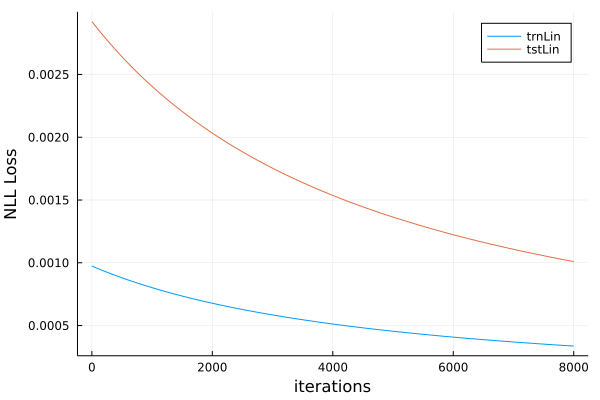

In [55]:
plot([losses, 3 .* losses], labels=["trnLin" "tstLin"],xlabel="iterations",ylabel="NLL Loss")

epoch: 1
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4/8000loss: 9.1893835
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 8/8000loss: 7.970579
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 12/8000loss: 7.190388
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 16/8000loss: 5.3715568
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 20/8000loss: 6.1596656
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 24/8000loss: 5.3930764
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 28/8000loss: 5.74

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 288/8000loss: 3.8468256
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 292/8000loss: 3.5322268
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 296/8000loss: 4.2493706
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 300/8000loss: 4.460978
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 304/8000loss: 4.2940736
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 308/8000loss: 3.81427
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 312/8000loss: 4.049

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 572/8000loss: 3.3423772
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 576/8000loss: 3.2536974
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 580/8000loss: 4.204502
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 584/8000loss: 3.7860816
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 588/8000loss: 4.0838804
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 592/8000loss: 3.7010355
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 596/8000loss: 2.4

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 860/8000loss: 2.9348764
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 864/8000loss: 3.5648205
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 868/8000loss: 3.5911262
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 872/8000loss: 3.4227817
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 876/8000loss: 3.5088005
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 880/8000loss: 2.9784777
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 884/8000loss: 3.

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1144/8000loss: 3.5569143
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1148/8000loss: 3.226765
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1152/8000loss: 2.3128247
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1156/8000loss: 3.284738
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1160/8000loss: 3.304263
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1164/8000loss: 2.6808732
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1168/8000loss

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1424/8000loss: 3.1704998
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1428/8000loss: 2.9563248
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1432/8000loss: 2.5969734
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1436/8000loss: 3.1949282
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1440/8000loss: 3.072288
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1444/8000loss: 2.479158
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1448/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1708/8000loss: 3.0243487
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1712/8000loss: 2.430534
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1716/8000loss: 2.3727705
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1720/8000loss: 3.260208
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1724/8000loss: 2.4756074
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1728/8000loss: 2.2367082
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1732/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1992/8000loss: 3.34079
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1996/8000loss: 2.4304428
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2000/8000loss: 2.534585
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2004/8000loss: 2.1055787
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2008/8000loss: 1.8023213
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2012/8000loss: 2.4730597
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2016/8000loss

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2276/8000loss: 3.0696552
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2280/8000loss: 2.5791435
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2284/8000loss: 2.9668753
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2288/8000loss: 2.238767
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2292/8000loss: 2.7619007
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2296/8000loss: 2.7648566
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2300/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2556/8000loss: 3.227832
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2560/8000loss: 2.4521952
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2564/8000loss: 2.7666678
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2568/8000loss: 2.8175647
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2572/8000loss: 2.1930215
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2576/8000loss: 2.663783
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2580/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2840/8000loss: 3.0109174
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2844/8000loss: 3.3513546
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2848/8000loss: 2.4150007
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2852/8000loss: 2.634622
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2856/8000loss: 2.5074282
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2860/8000loss: 2.9803524
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2864/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3124/8000loss: 2.6270874
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3128/8000loss: 2.9929185
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3132/8000loss: 3.049561
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3136/8000loss: 2.2646172
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3140/8000loss: 2.254741
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3144/8000loss: 1.9517577
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3148/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3408/8000loss: 2.068966
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3412/8000loss: 2.4678607
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3416/8000loss: 2.5989182
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3420/8000loss: 2.4553118
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3424/8000loss: 2.4138746
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3428/8000loss: 2.257447
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3432/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3688/8000loss: 2.0776386
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3692/8000loss: 2.3678067
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3696/8000loss: 1.8113976
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3700/8000loss: 2.5762415
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3704/8000loss: 2.0147824
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3708/8000loss: 2.0991907
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3712/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3972/8000loss: 2.5308058
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3976/8000loss: 2.5025485
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3980/8000loss: 3.1786392
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3984/8000loss: 2.3028479
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3988/8000loss: 2.6689126
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3992/8000loss: 2.8271236
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3996/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4256/8000loss: 2.993135
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4260/8000loss: 2.3414989
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4264/8000loss: 2.7656586
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4268/8000loss: 2.5311632
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4272/8000loss: 2.1251445
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4276/8000loss: 2.2236888
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4280/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4540/8000loss: 2.5710015
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4544/8000loss: 2.2767382
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4548/8000loss: 2.8642118
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4552/8000loss: 2.0132973
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4556/8000loss: 2.23188
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4560/8000loss: 2.2907245
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4564/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4820/8000loss: 2.066004
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4824/8000loss: 2.2273524
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4828/8000loss: 2.4631188
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4832/8000loss: 2.2131433
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4836/8000loss: 2.3077495
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4840/8000loss: 1.8812861
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4844/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5104/8000loss: 2.299684
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5108/8000loss: 2.2517848
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5112/8000loss: 2.4798064
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5116/8000loss: 1.9290596
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5120/8000loss: 2.1227462
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5124/8000loss: 2.1127896
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5128/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5388/8000loss: 2.6360242
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5392/8000loss: 2.6653323
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5396/8000loss: 1.9515486
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5400/8000loss: 2.4760826
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5404/8000loss: 2.5453665
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5408/8000loss: 2.9072104
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5412/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5672/8000loss: 2.1966445
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5676/8000loss: 2.0137556
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5680/8000loss: 2.3434968
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5684/8000loss: 2.058577
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5688/8000loss: 2.5616484
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5692/8000loss: 1.5810127
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5696/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5956/8000loss: 2.3688757
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5960/8000loss: 2.5949411
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5964/8000loss: 2.097166
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5968/8000loss: 1.6447809
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5972/8000loss: 2.0747929
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5976/8000loss: 1.9123999
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5980/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6236/8000loss: 2.052363
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6240/8000loss: 2.83089
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6244/8000loss: 2.087285
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6248/8000loss: 2.091116
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6252/8000loss: 2.3160803
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6256/8000loss: 2.5166652
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6260/8000loss: 

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6520/8000loss: 2.1183567
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6524/8000loss: 2.1269977
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6528/8000loss: 2.3816202
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6532/8000loss: 2.0284488
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6536/8000loss: 2.00764
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6540/8000loss: 2.0652838
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6544/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6804/8000loss: 2.1962237
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6808/8000loss: 1.9020553
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6812/8000loss: 1.9475602
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6816/8000loss: 1.8137683
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6820/8000loss: 2.0962515
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6824/8000loss: 2.159209
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6828/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7088/8000loss: 2.120624
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7092/8000loss: 2.2298977
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7096/8000loss: 2.0034058
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7100/8000loss: 1.9732552
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7104/8000loss: 1.9918879
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7108/8000loss: 2.1965954
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7112/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7368/8000loss: 2.2045763
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7372/8000loss: 2.304268
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7376/8000loss: 1.8962538
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7380/8000loss: 2.0628119
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7384/8000loss: 1.9474676
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7388/8000loss: 2.2247176
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7392/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7652/8000loss: 1.5821303
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7656/8000loss: 2.410009
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7660/8000loss: 1.6286716
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7664/8000loss: 1.8554184
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7668/8000loss: 2.2072756
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7672/8000loss: 2.70884
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7676/8000loss

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7936/8000loss: 1.8828776
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7940/8000loss: 2.0191867
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7944/8000loss: 1.8437998
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7948/8000loss: 2.2205293
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7952/8000loss: 1.9483924
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7956/8000loss: 2.072074
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 7960/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 220/8000loss: 1.9597578
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 224/8000loss: 1.9432427
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 228/8000loss: 1.9458869
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 232/8000loss: 1.8540606
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 236/8000loss: 1.9140962
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 240/8000loss: 1.8487399
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 244/8000loss: 1.

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 504/8000loss: 1.8175833
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 508/8000loss: 2.0201612
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 512/8000loss: 1.5832833
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 516/8000loss: 1.3088342
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 520/8000loss: 2.104836
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 524/8000loss: 2.1138778
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 528/8000loss: 2.3

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 792/8000loss: 1.7222321
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 796/8000loss: 2.3961763
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 800/8000loss: 1.7778893
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 804/8000loss: 1.9333609
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 808/8000loss: 1.5680398
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 812/8000loss: 1.1469669
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 816/8000loss: 2.

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1076/8000loss: 1.4848609
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1080/8000loss: 1.7251415
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1084/8000loss: 1.5839882
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1088/8000loss: 1.9626967
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1092/8000loss: 1.9586673
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1096/8000loss: 1.783709
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1100/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1356/8000loss: 2.074224
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1360/8000loss: 2.1328497
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1364/8000loss: 1.4803042
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1368/8000loss: 1.959552
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1372/8000loss: 1.7112387
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1376/8000loss: 1.6912025
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1380/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1640/8000loss: 1.7237482
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1644/8000loss: 2.0471303
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1648/8000loss: 1.8605893
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1652/8000loss: 1.7346858
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1656/8000loss: 1.728286
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1660/8000loss: 1.8127948
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1664/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1924/8000loss: 1.6253998
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1928/8000loss: 2.108415
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1932/8000loss: 2.1270003
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1936/8000loss: 1.7868437
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1940/8000loss: 2.1482432
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1944/8000loss: 1.9427111
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 1948/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2208/8000loss: 1.7721827
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2212/8000loss: 2.0881143
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2216/8000loss: 1.8938017
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2220/8000loss: 1.6276869
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2224/8000loss: 1.6939703
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2228/8000loss: 1.6027163
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2232/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2488/8000loss: 1.8303875
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2492/8000loss: 1.8607676
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2496/8000loss: 1.6035305
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2500/8000loss: 1.6987697
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2504/8000loss: 1.8982153
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2508/8000loss: 1.78522
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2512/8000los

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2772/8000loss: 1.3906705
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2776/8000loss: 1.680454
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2780/8000loss: 1.5994643
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2784/8000loss: 1.6249945
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2788/8000loss: 1.7180157
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2792/8000loss: 1.6437436
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 2796/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3056/8000loss: 1.7137374
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3060/8000loss: 1.5408231
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3064/8000loss: 1.6910015
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3068/8000loss: 1.3379592
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3072/8000loss: 1.5569814
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3076/8000loss: 1.6466864
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3080/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3336/8000loss: 1.5135403
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3340/8000loss: 1.5822212
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3344/8000loss: 1.4118726
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3348/8000loss: 2.0709405
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3352/8000loss: 2.049938
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3356/8000loss: 1.6858927
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3360/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3620/8000loss: 1.2456403
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3624/8000loss: 1.7630931
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3628/8000loss: 1.8747429
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3632/8000loss: 2.0258174
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3636/8000loss: 1.574608
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3640/8000loss: 1.5781949
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3644/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3904/8000loss: 1.7478848
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3908/8000loss: 1.4645069
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3912/8000loss: 1.7824514
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3916/8000loss: 1.2439839
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3920/8000loss: 1.5873111
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3924/8000loss: 1.907465
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 3928/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4188/8000loss: 1.4202946
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4192/8000loss: 1.4009567
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4196/8000loss: 1.3963544
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4200/8000loss: 1.7756588
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4204/8000loss: 1.6615651
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4208/8000loss: 1.4950519
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4212/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4468/8000loss: 1.6159635
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4472/8000loss: 1.7921401
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4476/8000loss: 1.9397808
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4480/8000loss: 1.8959239
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4484/8000loss: 1.7746829
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4488/8000loss: 1.1966661
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4492/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4752/8000loss: 1.3560132
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4756/8000loss: 1.6734966
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4760/8000loss: 1.4318886
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4764/8000loss: 1.4817507
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4768/8000loss: 1.4117243
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4772/8000loss: 1.5668119
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 4776/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5036/8000loss: 1.6983459
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5040/8000loss: 1.7494074
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5044/8000loss: 1.5163213
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5048/8000loss: 1.5233877
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5052/8000loss: 1.5193758
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5056/8000loss: 1.4960216
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5060/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5316/8000loss: 1.6083348
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5320/8000loss: 1.7682221
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5324/8000loss: 1.706184
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5328/8000loss: 1.4628272
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5332/8000loss: 1.8247194
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5336/8000loss: 1.6413893
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5340/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5600/8000loss: 1.6272042
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5604/8000loss: 1.7398604
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5608/8000loss: 1.3492306
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5612/8000loss: 1.5756924
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5616/8000loss: 1.5979036
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5620/8000loss: 1.4307443
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5624/8000l

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5884/8000loss: 1.7375381
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5888/8000loss: 1.403918
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5892/8000loss: 1.3752049
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5896/8000loss: 1.4356369
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5900/8000loss: 1.4909909
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5904/8000loss: 1.6686503
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 5908/8000lo

AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6168/8000loss: 1.5920229
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6172/8000loss: 1.3815379
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6176/8000loss: 1.0952468
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6180/8000loss: 1.5008211
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6184/8000loss: 1.8514955
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6188/8000loss: 1.2086263
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6192/8000l

Excessive output truncated after 524288 bytes.

3}}iter: 6448/8000loss: 1.3294785
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6452/8000loss: 1.3289098
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6456/8000loss: 1.672533
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6460/8000loss: 1.5032082
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6464/8000loss: 1.3932319
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6468/8000loss: 1.2186309
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}iter: 6472/8000loss: 1.2962966
AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetArray{Float32, 3}}AutoGrad.Result{KnetA

┌ Info: Loading pretrained weights...
└ @ Main.ResNetLib /home/tanjary21/Desktop/Julia/nlp/project/resnet/resnetlib.jl:295
┌ Info: Loading imagenet-resnet-50-dag.mat...
└ @ Main.ResNetLib /home/tanjary21/.julia/packages/Knet/YIFWC/data/imagenet.jl:12


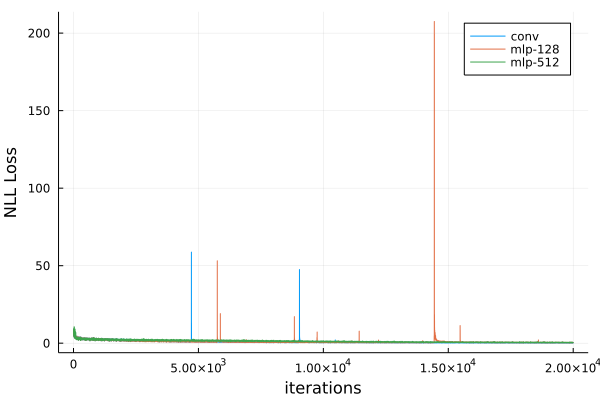

In [5]:
# MAIN TRAINING SCRIPT  - 13 minutes/epoch
# img_iterator = ImgReader("archive/img_dirs.txt",load_and_process)
# tgt_iterator = TextReader("archive/ann_caps.txt",v)

# Dataset has 8000 images
# Each batch is 4 images (4 unqiue, each with 5 captions, so batch size is actually 20)
# So there will be 1:2000 iterations for one epoch
transformer_conv = Transformer(128, length(tgt_iterator.vocab.i2w), tgt_iterator.vocab.eos, true)
transformer_mlp_128 = Transformer(128, length(tgt_iterator.vocab.i2w), tgt_iterator.vocab.eos, false)
transformer_mlp_512 = Transformer(512, length(tgt_iterator.vocab.i2w), tgt_iterator.vocab.eos, false)

losses_conv = []
losses_mlp_128 = []
losses_mlp_512 = []
for epoch in 1:1:10
    println("epoch: ", epoch)
    iter = 1
    img_state, tgt_state = nothing, nothing
    img_iterator = ImgReader("archive/img_dirs_train.txt",load_and_process)
    tgt_iterator = TextReader("archive/ann_caps_train.txt",v)
    while true #iter < 100 #flag !== nothing
        batch = get_next_batch(img_iterator, tgt_iterator, img_state, tgt_state)
        if batch == nothing
            break
        end
        batch_imgs, batch_indices, img_state, tgt_state = batch
        batch_imgs, batch_indices, labels = prepare_batch(batch, tgt_iterator)

        loss_conv = @diff transformer_conv(batch_imgs, batch_indices, labels)
        loss_mlp_128 = @diff transformer_mlp_128(batch_imgs, batch_indices, labels)
        loss_mlp_512 = @diff transformer_mlp_512(batch_imgs, batch_indices, labels)

        # updates
        for p in params(transformer_conv)
            diff_p = grad(loss_conv, p)
            if diff_p == nothing
                continue
            else
                p .= p - (0.1 .* diff_p)
            end
        end
        # updates
        for p in params(transformer_mlp_128)
            diff_p = grad(loss_mlp_128, p)
            if diff_p == nothing
                continue
            else
                p .= p - (0.1 .* diff_p)
            end
        end
        # updates
        for p in params(transformer_mlp_512)
            diff_p = grad(loss_mlp_512, p)
            if diff_p == nothing
                continue
            else
                p .= p - (0.1 .* diff_p)
            end
        end

        println("iter: ", 4*iter, "/8000", "loss: ", value(loss_conv))
        push!(losses_conv, value(loss_conv))
        push!(losses_mlp_128, value(loss_mlp_128))
        push!(losses_mlp_512, value(loss_mlp_512))
        iter = iter + 1
    end
end

# plot training loss
plot([losses_conv, losses_mlp_128, losses_mlp_512], labels=["conv" "mlp-128" "mlp-512"],xlabel="iterations",ylabel="NLL Loss")

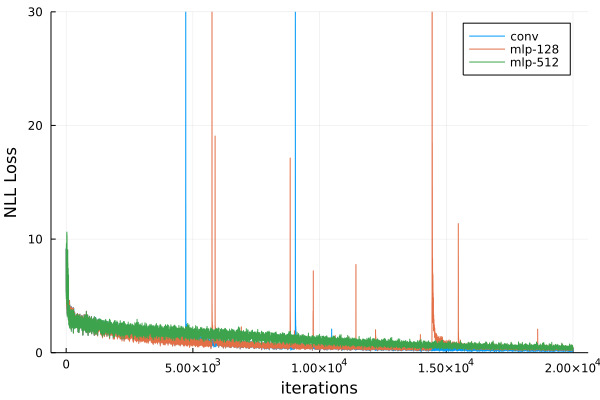

In [9]:
# plot training loss
plot([losses_conv, losses_mlp_128, losses_mlp_512], labels=["conv" "mlp-128" "mlp-512"],ylim=(0.0, 30.0),xlabel="iterations",ylabel="NLL Loss")

KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}KnetArray{Float32, 3}["<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>"; "<eos>";;]


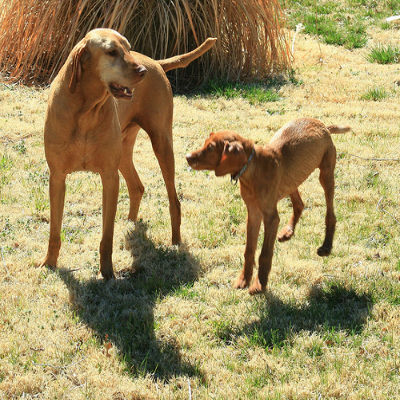

In [8]:
# simulate inference
img_state, tgt_state = nothing, nothing
batch = get_next_batch(img_iterator, tgt_iterator, img_state, tgt_state)

batch_imgs, batch_indices, img_state, tgt_state = batch
batch_imgs, batch_indices, labels = prepare_batch(batch, tgt_iterator)

sample_img, pred_sent = transformer_conv(batch_imgs[:,:,:,5:5]);
println(tgt_iterator.vocab.i2w[pred_sent]);
colorview(RGB, Array(sample_img))

In [30]:
batch_indices

15×20 Matrix{Int64}:
   1    1    1    1    1    1    1    1  …    1    1    1    1    1    1    1
   2    2    2    2    2    2    2    2       2    2    2    2    2    2    2
   3    3    3    4   46    3    3    4       3    3    3    4    4    3    3
  11   11   14   19   16   14   29   40     251  144   11   45   18   14   77
  10   51    5    8   10    5    7   16     248   68    6   10    6    5   15
  44   53    3   29   30    3    8   17  …    2  276    3   62    3    3    7
   5    3   96    7    3   96    3  647       1  206  132    3  227  704   32
  50  116  149   10  838  900  223    9       1    3   10  524   10  367  106
  12   30   31   36   39  147    7  438       1  190  711   88   32    8    2
   3    3    9  475   69  252   17    5       1   26   26    1   35   15    1
 815  496   41   35   46   75   30   50  …    1    3    3    1    4  147    1
 446    1   87    4   90   12    5   12       1  299  221    1   72   54    1
   1    1   74   33    3    3    4  142    

In [29]:
labels

15×20 Matrix{Int64}:
   2    2    2    2    2    2    2    2  …    2    2    2    2    2    2    2
   3    3    3    4   46    3    3    4       3    3    3    4    4    3    3
  11   11   14   19   16   14   29   40     251  144   11   45   18   14   77
  10   51    5    8   10    5    7   16     248   68    6   10    6    5   15
  44   53    3   29   30    3    8   17       2  276    3   62    3    3    7
   5    3   96    7    3   96    3  647  …    1  206  132    3  227  704   32
  50  116  149   10  838  900  223    9       0    3   10  524   10  367  106
  12   30   31   36   39  147    7  438       0  190  711   88   32    8    2
   3    3    9  475   69  252   17    5       0   26   26    1   35   15    1
 815  496   41   35   46   75   30   50       0    3    3    0    4  147    0
 446    1   87    4   90   12    5   12  …    0  299  221    0   72   54    0
   1    0   74   33    3    3    4  142       0    1    1    0    1   27    0
   0    0    1    1  184  148   34    1    

In [12]:
# save model
Knet.save("transformer_mlp_512_epoch10.jld2","transformer",transformer_mlp_512)

In [17]:
# load model
pretrained = Knet.load("pretrained.jld2","transformer")

# simulate inference
sample_img, pred_sent = pretrained(batch_imgs[:,:,:,1:1]);
println(tgt_iterator.vocab.i2w[pred_sent]);
colorview(RGB, Array(sample_img))